## NFL Combine and its impact in NFL Draft
 We always have the big question: What does it take to be in the NFL? We really don't know since there have been home runs in late picks like Tom Brady or even Antonio Brown. Or busts like Ryan Leaf or Jamarcus Russell. 

 NFL Draft is the oportunity for teams to bring in fresh new talent to improve or get their new franchise player. However, is there any meaning in the combine? 
 
 The NFL Combine is where college football players perform physical and mental tests in front of National Football League coaches, general managers, and scouts.

 Lets's take a look at last year's combine to determine what is the most relevant variable. 

In [ ]:
# Import all the important libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import pandas as pd

# Import the web scraping libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Create the variables for PFR

years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
d={}
year=2010
while year != 2022:
  url = f"https://www.pro-football-reference.com/draft/{year}-combine.htm"
  html = urlopen(url)
  combine_data=bs(html)
  column_headers = combine_data.findAll('tr')[0]
  column_headers = [i.getText() for i in column_headers.findAll('th')]
  rows = combine_data.findAll('tr')[1:]
  comb_data=[]
  for i in range(len(rows)):
    comb_data.append([col.getText() for col in rows[i].findAll('td')])
  #print(comb_data)
  data = pd.DataFrame(comb_data, columns=column_headers[1:])
  df = data[(data != data.columns).all(axis=1)]
  d["combine{0}".format(year)]=df
  year=year+1
  


In [ ]:
# Merge everything into a beautiful DataFrame
df=pd.concat(d.values(),ignore_index=True)
df.head()



,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,WR,Fresno State,College Stats,6-3,204,4.60,36.0,14,115,7.22,4.39,
1,DE,LSU,College Stats,6-3,251,4.75,30.5,,106,7.54,4.80,
2,DT,LSU,College Stats,6-4,300,5.40,,,,,,
3,WR,Missouri,College Stats,6-5,215,4.62,,,,,,
4,S,South Florida,College Stats,6-0,207,4.50,,16,,,,Philadelphia Eagles / 2nd / 37th pick / 2010


In [ ]:
#First of all lets clean the data and get more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Pos                  4098 non-null   object
 1   School               4098 non-null   object
 2   College              4098 non-null   object
 3   Ht                   4098 non-null   object
 4   Wt                   4098 non-null   object
 5   40yd                 4098 non-null   object
 6   Vertical             4098 non-null   object
 7   Bench                4098 non-null   object
 8   Broad Jump           4098 non-null   object
 9   3Cone                4098 non-null   object
 10  Shuttle              4098 non-null   object
 11  Drafted (tm/rnd/yr)  4098 non-null   object
dtypes: object(12)
memory usage: 391.3+ KB


In [ ]:
#Some Houskeeping
df=df.apply(lambda x:x.str.replace('-','.'))
df=df.apply(pd.to_numeric, errors='ignore')
df

,Pos,School,College,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,WR,Fresno State,College Stats,6.30,204.0,4.60,36.0,14.0,115.0,7.22,4.39,
1,DE,LSU,College Stats,6.30,251.0,4.75,30.5,NaN,106.0,7.54,4.80,
2,DT,LSU,College Stats,6.40,300.0,5.40,NaN,NaN,NaN,NaN,NaN,
3,WR,Missouri,College Stats,6.50,215.0,4.62,NaN,NaN,NaN,NaN,NaN,
4,S,South Florida,College Stats,6.00,207.0,4.50,NaN,16.0,NaN,NaN,NaN,Philadelphia Eagles / 2nd / 37th pick / 2010
...,...,...,...,...,...,...,...,...,...,...,...,...
4168,TE,Notre Dame,College Stats,6.40,257.0,4.62,31.5,26.0,118.0,7.27,4.25,
4169,DB,Oregon St.,College Stats,6.40,183.0,4.46,31.0,6.0,126.0,7.24,4.57,Dallas Cowboys / 3rd / 99th pick / 2021
4170,TE,Mississippi,College Stats,6.30,250.0,NaN,34.0,NaN,116.0,NaN,NaN,
4171,DB,Iowa,College Stats,5.11,195.0,4.70,32.0,NaN,118.0,7.41,4.38,


## Frist Approach
We want to know the pre draft relevance for NFL prospects. The main scope of this algorithm is to weight on the relevance of the physical traits and times registered for the Combine. We will also bring some context into the algorithm. Like for example, how much does it weight in a PAC-12 prospect from a Big10 prospect. 

The first algorithm will only determine if the prospect was drafted or not. Since it is a binary approach we will try a Logistic Regression to see the importance of the variables. 

On the next approaches we will try out the rounds in which the prospect is drafted. 

### Exploratory Data Analysis

In [ ]:
df.describe()

,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
count,4069.000000,4074.000000,3749.000000,3278.000000,2992.000000,3226.000000,2621.000000,2710.000000
mean,6.075173,242.050565,4.768320,32.892251,20.177473,115.473032,7.246127,4.409557
std,0.455392,45.100362,0.299886,4.185943,6.504756,9.287687,0.403934,0.262467
min,5.100000,144.000000,4.220000,17.500000,2.000000,82.000000,6.280000,3.810000
25%,6.000000,205.000000,4.530000,30.000000,15.000000,110.000000,6.950000,4.210000
50%,6.200000,232.000000,4.680000,33.000000,20.000000,117.000000,7.150000,4.370000
75%,6.400000,277.750000,4.960000,36.000000,24.000000,122.000000,7.490000,4.570000
max,6.900000,369.000000,6.000000,46.500000,49.000000,147.000000,9.040000,5.560000


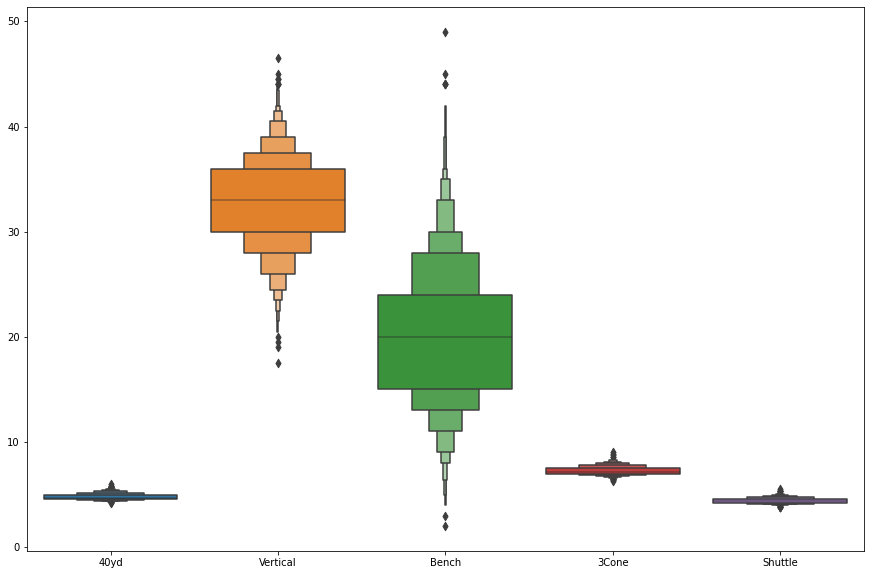

In [ ]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.boxenplot(data=df[['40yd','Vertical','Bench','3Cone','Shuttle']])
plt.show()

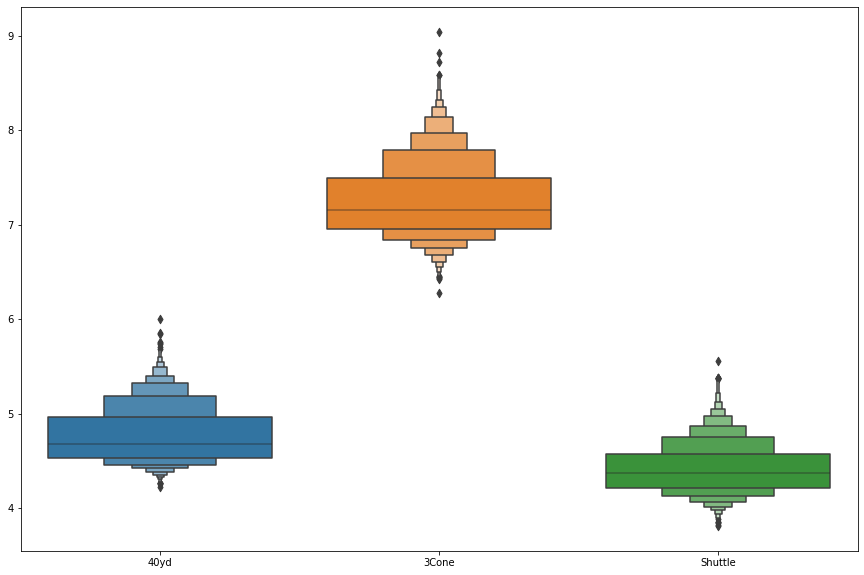

In [ ]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.boxenplot(data=df[['40yd','3Cone','Shuttle']])
plt.show()

## EDA Results
- We don't have clear outliers in order to remove them
- The records on the measurments are not a big outlier so we can leave them

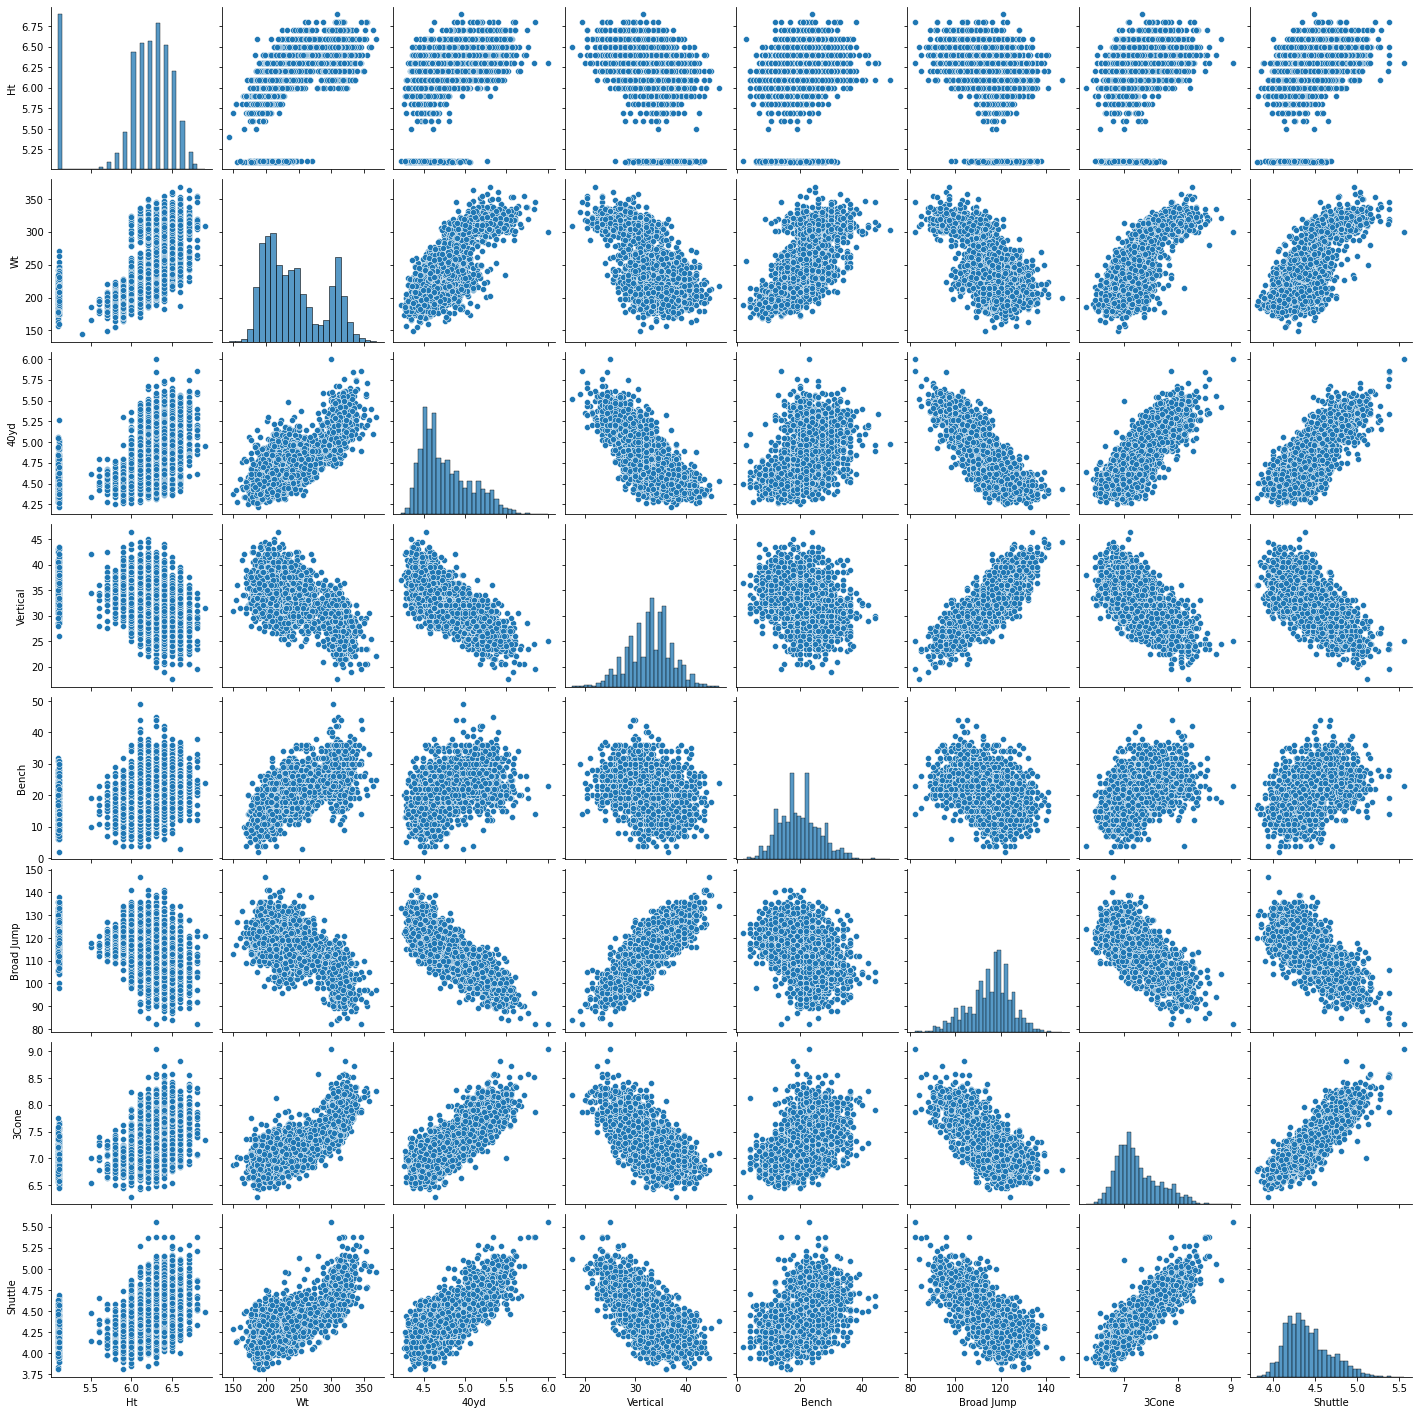

In [ ]:
sns.pairplot(data=df)

In [ ]:
#Lets take a look at how many players we have at each position (To see balanced classes)
df[['Pos']].value_counts()

Pos 
WR      580
CB      416
RB      364
S       283
OT      257
DT      244
DE      240
TE      225
OLB     217
QB      208
OG      166
OL      141
ILB     134
LB      125
DL      115
C        80
P        71
DB       61
K        52
EDGE     47
FB       41
LS       20
NT        5
PK        4
T         2
dtype: int64

## Positions
Ok, so we have to deal with the multiple classes of positions that the players declare for. Even though, there are similar positions: NT could be placed as DT, T could be placed as OT, OLB, ILB, and LB can be merged into LB only. We need to reduce the amount of classes in order to get more accuracy. Some scouts would be mad at me for doing this. 

In [ ]:
#Dictionary for class reductions
c={"OLB":"LB","ILB":"LB","DB":"S","NT":"DT","T":"OT","PK":"K","EDGE":"DE"}
df['Pos']=df.Pos.replace(c)
df['Pos'].value_counts()

WR    580
LB    476
CB    416
RB    364
S     344
DE    287
OT    259
DT    249
TE    225
QB    208
OG    166
OL    141
DL    115
C      80
P      71
K      56
FB     41
LS     20
Name: Pos, dtype: int64

In [ ]:
import requests
wikiurl="https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_programs"
wiki_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [ ]:
soup = bs(response.text, 'html.parser')
coltable=soup.find('table',{'class':"wikitable"})

In [ ]:
cfb=pd.read_html(str(coltable))
cfb=pd.DataFrame(cfb[0])
cfb.head()

,Team,Nickname,City,State[1],Enrollment,Currentconference,Formerconferences,Firstplayed,JoinedFBS
0,Air Force,Falcons,Colorado Springs,Colorado,4237,Mountain West,WAC,1955,NaN
1,Akron,Zips,Akron,Ohio,19200,MAC,"OAC, MCC, OVC",1891,1987
2,Alabama,Crimson Tide,Tuscaloosa,Alabama,38500,SEC,"SIAA, SoCon",1892,NaN
3,Appalachian State,Mountaineers,Boone,North Carolina,19100,Sun Belt,"NSC, SoCon",1928,2014[n 1]
4,Arizona,Wildcats,Tucson,Arizona,45200,Pac-12,"BIAA, WAC",1899,NaN


In [ ]:
df=pd.merge(df.drop('College',axis=1),cfb[['Team','Currentconference']],how='left',left_on='School',right_on='Team')

In [ ]:
df.head()

,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr),Team,Currentconference
0,WR,Fresno State,6.3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,,Fresno State,Mountain West
1,DE,LSU,6.3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,,LSU,SEC
2,DT,LSU,6.4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,,LSU,SEC
3,WR,Missouri,6.5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,,Missouri,SEC
4,S,South Florida,6.0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,Philadelphia Eagles / 2nd / 37th pick / 2010,South Florida,American


In [ ]:
df[['Tm','rnd','pc','yr']]=df['Drafted (tm/rnd/yr)'].str.split('/',expand=True)
df=df.drop(['Drafted (tm/rnd/yr)','Team'],axis=1)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df=df.drop('pc',axis=1)
df.head()


,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Currentconference,Tm,rnd,yr
0,WR,Fresno State,6.3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,Mountain West,,None,None
1,DE,LSU,6.3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,SEC,,None,None
2,DT,LSU,6.4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,SEC,,None,None
3,WR,Missouri,6.5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,SEC,,None,None
4,S,South Florida,6.0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,American,Philadelphia Eagles,2nd,2010


In [ ]:
categ=['Pos','Currentconference','Tm','rnd','School']
df[categ]=df[categ].apply(le.fit_transform)
df.head()

,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Currentconference,Tm,rnd,yr
0,17,77,6.3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,12,0,7,None
1,2,110,6.3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,14,0,7,None
2,4,110,6.4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,14,0,7,None
3,17,143,6.5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,14,0,7,None
4,15,217,6.0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,1,27,1,2010


In [ ]:
df['yr']=df['yr'].replace({np.nan:0})
df['yr']=df['yr'].astype(str).astype(float)
df['drafted']=np.where(df['yr']!=0,1,0)

In [ ]:
df.head()
df=df.fillna(0)

In [ ]:
df.drafted.value_counts(normalize=True)

1    0.621855
0    0.378145
Name: drafted, dtype: float64

## Stat Model 
- We will try several things: we will try a Logistic Regression given the Target and removing non relevant variables like the specs of pick like rd, tm, and yr, then we will calculate the metrics to see if the Logistic Regression is effective and then calculate the P-Values with Statsmodels

### Logistic Regression

In [ ]:
X=df.drop(['Tm','rnd','yr','drafted'],axis=1)
y=df[['drafted']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
sc=StandardScaler()
logreg=LogisticRegression()#class_weight={1:0.621,0:0.3781}, 
steps=[('scaling',sc),('logistic_regression',logreg)]
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaling', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
pipeline.score(X_test,y_test)

0.6378809869375908

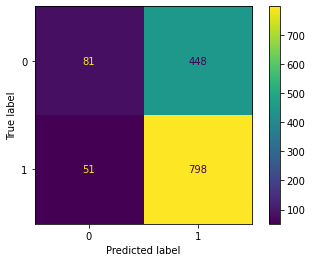

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.61      0.15      0.25       529
           1       0.64      0.94      0.76       849

    accuracy                           0.64      1378
   macro avg       0.63      0.55      0.50      1378
weighted avg       0.63      0.64      0.56      1378



In [ ]:
import statsmodels.api as sm
log_reg=sm.Logit(y_train,X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.633261
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                drafted   No. Observations:                 2795
Model:                          Logit   Df Residuals:                     2784
Method:                           MLE   Df Model:                           10
Date:                Thu, 03 Mar 2022   Pseudo R-squ.:                 0.04301
Time:                        23:37:56   Log-Likelihood:                -1770.0
converged:                       True   LL-Null:                       -1849.5
Covariance Type:            nonrobust   LLR p-value:                 4.966e-29
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Pos                  -0.0355      0.007     -5.068      0.000      -0.049      -0.022
School  

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
sc=StandardScaler()
rfc=RandomForestClassifier(class_weight={1:0.621,0:0.3781})#class_weight={0:0.621,1:0.3781}, 
steps=[('scaling',sc),('random_forest',rfc)]
p2=Pipeline(steps)
p2.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaling', StandardScaler()),
                ('random_forest',
                 RandomForestClassifier(class_weight={0: 0.3781, 1: 0.621}))])

In [ ]:
y_pred2=p2.predict(X_test)

In [ ]:
p2.score(X_test,y_test)

0.6843251088534107

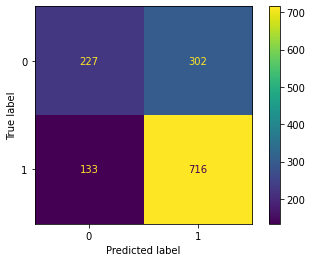

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred2)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test,y_pred2,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.63      0.43      0.51       529
           1       0.70      0.84      0.77       849

    accuracy                           0.68      1378
   macro avg       0.67      0.64      0.64      1378
weighted avg       0.68      0.68      0.67      1378



In [ ]:
dir(p2)

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = p2._final_estimator.feature_importances_
std = np.std([p2._final_estimator.feature_importances_ for tree in p2._final_estimator.estimators_], axis=0)

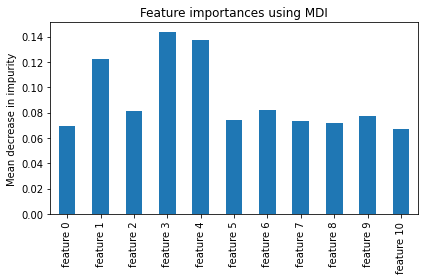

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


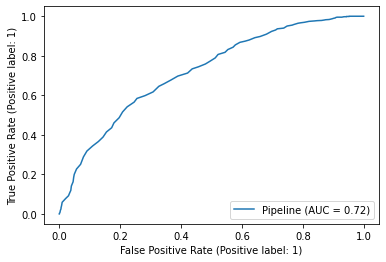

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(p2, X_test, y_test) 

plt.show()

The Variables that were the most important were 
- School
- Weight
- 40 Yd Dash Time